# Final Project - MATH2319 Machine Learning

Semester 1, 2020 <br>
Alejandro Rivera Alvarez - S3758098 <br>
Kanishka Tamang - S3756188<br>
RMIT University

## Table of contents

* [1. Introduction](#1)
* [2. Data Description](#2)
* [3. Abstract](#3)
* [4. Data extraction](#4)
* [5. Data pre-processing](#5)
    * [5.1 Check for undesirable features ](#5.1)
    * [5.2 Checking missing values](#5.2)
    * [5.3 Outliers](#5.3)
    * [5.4 Adjusting descriptive features to desired format](#5.4)
        * [5.4.1 One hot encoding for categorical features ](#5.4.1)
        * [5.4.2 Scaling Descriptive Features](#5.4.2)
        * [5.4.3 Remapping target feature ](#5.4.3)
* [6. Data Exploration](#6)
    * [6.1 One-variable plots](#6.1)
    * [6.2 Two variable plots ](#6.2)
    * [6.3 Three variable plots](#6.3)
* [7. Data modelling](#7)
    * [7.1 Feature selection](#7.1)
        * [7.1.1 Mutual Information ](#7.1.1)
        * [7.1.2 Random Forest Importance](#7.1.2)
        * [7.1.3 F-Score](#7.1.3)
        * [7.1.4 SPSA](#7.1.4)
        * [7.1.5 Performance Comparison Using Paired T-Tests](#7.1.5)
    * [7.2 Hyperparameter fine-tuning](#7.2)
        * [7.2.1 K-Nearest Neighbors](#7.2.1)
        * [7.2.2 Decision Tree ](#7.2.2)
        * [7.2.3 Random Forest](#7.2.3)
        * [7.2.4 Gaussian Naive Bayes](#7.2.4)
    * [7.3 Multinomial Evaluation Metrics](#7.3)
        * [7.3.1 Model evaluation with test set](#7.3.1)
        * [7.3.2 Model evaluation using K-Fold cross validation](#7.3.2)
        * [7.3.3 Model comparison](#7.3.3)
* [8. Project Review](#8)
* [9. Conclusion](#9)
* [10. Reference List](#10)

# 1. Introduction <a class="anchor" id="1"></a>

Family Planning refers to the ability of a couple to give birth to the desired number of children and to have the best age gap (preferably 24 months) between the first and second child (WHO,2020). Primarily, family planning helps to reduce the need for an abortion of a child and sometimes the death of a mother. Due to the revolution of medical science, there is now a low death rate and with the increase in unplanned children, there would be a spike in the global population further having a derogative effect on the economy.
<br>

The aim of this project is to analyse the major socio-economic factors which explains the current contraceptive method choice of a woman. Therefore, a prediction model is developed based on machine learning strategies to predict the kind of contraceptive method adopted by a woman.

# 2. Data Description  <a class="anchor" id="2"></a>

This dataset is a part of the 1987 National Indonesia Contraceptive Prevalence Survey (NICPS). Interestingly, it was the first survey of this kind conducted in Indonesia (World Bank 2011). The main objective of this survey was to provide an information on the current method of family planning and the trend of fertility rate seen amongst the Indonesian population. This information would be very useful for researchers and policy makers to spread an awareness of Family Planning, which has a direct impact on the global economy at a large scale (World Bank 2011).

This dataset is sourced from UCI Machine Learning Repository (Dua & Graff 2019), that provides two files:
* `cmc.data` contains the Contraceptive Method Choice data.
* `cmc.names` contains basic information of the dataset and details of attributes. 

The dataset has 1473 observations and consist of 9 descriptives variables and one target feature representing the contraceptive method used. The file does not contain column labels, so they were generated based on the description of each column. Each column description, its type and the corresponding column label are detailed below.

| Description | Variable Type | Levels  |  Label name | 
|------|------|------|------|
|   Wife's age  | numerical|      |  wife_age |
| Wife's education   | categorical| 1=low, 2, 3, 4=high | wife_education|
| Husband's education  |  categorical | 1=low, 2, 3, 4=high  |  husband_education |
|  Number of children ever born  | numerical|     | num_children|
|  Wife's religion  | binary| 0=Non-Islam, 1=Islam  | wife_religion|
| Wife's now working? | binary| 0=Yes, 1=No  | wife_employment_status|
| Husband's occupation   | categorical| 1, 2, 3, 4  | husband_occupation|
| Standard-of-living index | categorical| 1=low, 2, 3, 4=high  | living_index|
| Media exposure | binary| 0=Good, 1=Not good | media_exposure|
| Contraceptive method used | categorical| 1=No-use, 2=Long-term, 3=Short-term | c_method|

So, the target variable in the dataset would be the contraceptive method used by the wife which is denoted by 'c_method'.

# 3. Abstract <a class="anchor" id="3"></a>

This report can be classified into three parts as follows:

**Data Preparation:** Firstly, the correct data types were assigned to the respective variables. It is important to note that the dataset did not have any missing values.There were some outliers detected with the help of a boxplot in the number of children variable. However, the outliers detected statistically is actually a normal phenomenon in reality. Thus the outliers have not been imputed nor dropped. While exploring the data, correct labels were assigned before plotting them. Prior to the Data modelling, One Hot Encoding was performed for the categorical variables. The labels in the target variables have been remapped as well from 1-3 to 0-2. After Encoding the variables, the descriptive features were scaled with the min-max scaler.

**Data Exploration:** The dimensions of the dataset was checked to have an idea of the data attributes. To explore the Data and visualise the relationships among the variables, a total of 13 graphs were plotted. The composition of the unique levels in all the columns have been explored in the form of percentages. The descriptive statistics have been found out for the numerical variables namely, age of the wife and the number of children.

**Data Modelling:** While selecting the features to predict the target feature, four different methods have been used to prevent any sorts of bias and have a optimal set of features. Later, to analyse the statistical significance of these results, a paired t-test has been calculated. Five features were selected based on the filter methods and a wrapper method. The data set was splitted in training and test set, 70:30 respectively. Model fitting was performed based on these 5 features, using four different algorithms on the training set. Finally, the models were evaluated with test set.

# 4. Data extraction  <a class="anchor" id="4"></a>


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings('ignore')
np.random.seed(999)

attributeNames = ['wife_age', 'wife_education', 'husband_education', 'num_children', 'wife_religion', 
                  'wife_employment_status', 'husband_occupation', 'living_index', 'media_exposure', 'c_method']
    
df_cmc = pd.read_csv("cmc.data", sep = ',', names = attributeNames, header = None)
df_cmc.head()

,wife_age,wife_education,husband_education,num_children,wife_religion,wife_employment_status,husband_occupation,living_index,media_exposure,c_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


The dataset dimensions and variable types are checked. The data frame has 1473 observations and 10 columns. There are some columns that does not have the correct data type.

In [2]:
print("Dimensions:", df_cmc.shape, "\n")
print("Type of columns")
print(df_cmc.dtypes)

Dimensions: (1473, 10) 

Type of columns
wife_age                  int64
wife_education            int64
husband_education         int64
num_children              int64
wife_religion             int64
wife_employment_status    int64
husband_occupation        int64
living_index              int64
media_exposure            int64
c_method                  int64
dtype: object


# 5. Data pre-processing  <a class="anchor" id="5"></a>
Convert categorical variables to the correct type.

In [3]:
categoricalCols = ['wife_education', 'husband_education', 'wife_religion','wife_employment_status', 'husband_occupation',
                   'living_index', 'media_exposure', 'c_method'] 
for col in categoricalCols:
    df_cmc[col] = df_cmc[col].astype('str')

Check the types again.

In [4]:
print(df_cmc.dtypes)

wife_age                   int64
wife_education            object
husband_education         object
num_children               int64
wife_religion             object
wife_employment_status    object
husband_occupation        object
living_index              object
media_exposure            object
c_method                  object
dtype: object


For each categorical column, the percentage of each unique level is displayed.

In [5]:
categoricalCols = df_cmc.columns[df_cmc.dtypes==object].tolist()
for c in categoricalCols:
    print('-----------------------------------------')
    print('Column ' + c + ':')
    print(df_cmc[c].value_counts(normalize=True).mul(100).round(2), '\n')

-----------------------------------------
Column wife_education:
4    39.17
3    27.83
2    22.67
1    10.32
Name: wife_education, dtype: float64 

-----------------------------------------
Column husband_education:
4    61.03
3    23.90
2    12.08
1     2.99
Name: husband_education, dtype: float64 

-----------------------------------------
Column wife_religion:
1    85.06
0    14.94
Name: wife_religion, dtype: float64 

-----------------------------------------
Column wife_employment_status:
1    74.95
0    25.05
Name: wife_employment_status, dtype: float64 

-----------------------------------------
Column husband_occupation:
3    39.71
1    29.60
2    28.85
4     1.83
Name: husband_occupation, dtype: float64 

-----------------------------------------
Column living_index:
4    46.44
3    29.26
2    15.55
1     8.76
Name: living_index, dtype: float64 

-----------------------------------------
Column media_exposure:
0    92.6
1     7.4
Name: media_exposure, dtype: float64 

--------

Summary of categorical columns.

In [6]:
df_cmc.describe(include = np.object)

,wife_education,husband_education,wife_religion,wife_employment_status,husband_occupation,living_index,media_exposure,c_method
count,1473,1473,1473,1473,1473,1473,1473,1473
unique,4,4,2,2,4,4,2,3
top,4,4,1,1,3,4,0,1
freq,577,899,1253,1104,585,684,1364,629


In [7]:
df_cmc.describe(include = np.number).round(2)

,wife_age,num_children
count,1473.00,1473.00
mean,32.54,3.26
std,8.23,2.36
min,16.00,0.00
25%,26.00,1.00
50%,32.00,3.00
75%,39.00,4.00
max,49.00,16.00


## 5.1 Check for undesirable features  <a class="anchor" id="5.1"></a>

The dataset does not have any ID-like columns or any redundant variable. Also it does not contain date or time features.

## 5.2 Checking missing values <a class="anchor" id="5.2"></a>
The number of missing values for each column is shown below. All the variables are clear of missing values.

In [8]:
df_cmc.isnull().sum()

wife_age                  0
wife_education            0
husband_education         0
num_children              0
wife_religion             0
wife_employment_status    0
husband_occupation        0
living_index              0
media_exposure            0
c_method                  0
dtype: int64

In [9]:
df_cmc.sample(n=10, random_state=999)

,wife_age,wife_education,husband_education,num_children,wife_religion,wife_employment_status,husband_occupation,living_index,media_exposure,c_method
891,30,4,4,2,0,0,3,3,0,3
1184,29,3,4,2,1,1,3,4,0,1
969,38,4,4,2,1,1,3,4,0,3
1407,36,2,3,6,1,1,2,4,0,3
476,44,4,4,6,0,1,1,3,0,2
796,28,4,4,5,1,1,2,4,0,3
1001,41,3,2,11,1,1,2,3,0,1
468,24,1,4,1,1,0,4,2,1,2
1189,37,3,4,0,1,1,3,4,0,1
249,46,3,2,11,1,0,2,2,1,1


## 5.3 Outliers  <a class="anchor" id="5.3"></a>


Outliers detection is performed over the numerical variables using boxplot approach.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

There were no outliers detected in the age of the wife variable.

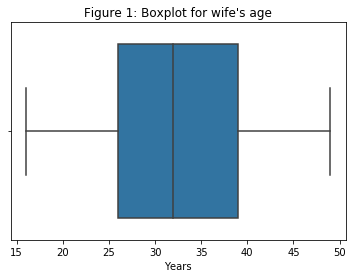

In [11]:
ax = sns.boxplot(x=df_cmc['wife_age'])
plt.title("Figure 1: Boxplot for wife's age") 
plt.xlabel("Years")
plt.show()

Figure 2 shows some outliers in the number of children variable, however, it is possible to have 8 to 16 children. Therefore, these values are not dropped nor imputed. 

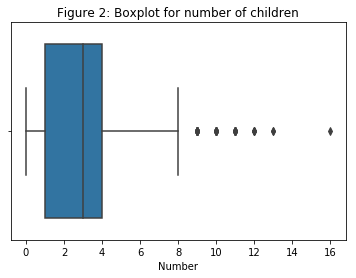

In [12]:
ax = sns.boxplot(x=df_cmc['num_children'])
plt.title("Figure 2: Boxplot for number of children") 
plt.xlabel("Number")
plt.show()

## 5.4 Adjusting descriptive features to desired format  <a class="anchor" id="5.4"></a>
The data is divided into descriptive features (Data) and the target feature (target).

In [13]:
Data = df_cmc.drop(columns = ['c_method'])
target = df_cmc['c_method']

### 5.4.1 One hot encoding for categorical features  <a class="anchor" id="5.4.1"></a>

All the descriptive variables need to be numeric because majority of the Scikit learn module works with only numerical data. It also increases the predictive power of the models (Vural Aksakalli, 2019).


In [14]:
categoricalCols = Data.columns[Data.dtypes==object].tolist()

for col in categoricalCols:
    if (len(Data[col].unique()) == 2):
        # if the variable has only 2 levels, use only one binary variable for one hot encoding
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

# For the other categorical features (with more than 2 levels) are encoded using q binary variables
Data = pd.get_dummies(Data)

print(Data.shape)

Data.sample(n=5, random_state=999)

(1473, 21)


,wife_age,num_children,wife_religion,wife_employment_status,media_exposure,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,husband_education_4,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4,living_index_1,living_index_2,living_index_3,living_index_4
891,30,2,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1184,29,2,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
969,38,2,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
1407,36,6,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
476,44,6,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0


## 5.4.2 Scaling Descriptive Features <a class="anchor" id="5.4.2"></a>

Each descriptive feature is normalized between 0 and 1 using a MinMaxScaler transformation available in Scikit learn package.It is very important to scale the features to a range which is centered around zero. This is done so that the variance of the features are in the same range (Asaithambi, 2020). 

In [15]:
from sklearn import preprocessing
data_scaled = preprocessing.MinMaxScaler().fit_transform(Data)
#Convert back into data frame
Data_df = pd.DataFrame(data_scaled, columns= Data.columns)
Data_df.sample(n=5, random_state=999)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,wife_age,num_children,wife_religion,wife_employment_status,media_exposure,wife_education_1,wife_education_2,wife_education_3,wife_education_4,husband_education_1,husband_education_2,husband_education_3,husband_education_4,husband_occupation_1,husband_occupation_2,husband_occupation_3,husband_occupation_4,living_index_1,living_index_2,living_index_3,living_index_4
891,0.424242,0.125,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1184,0.393939,0.125,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
969,0.666667,0.125,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1407,0.606061,0.375,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
476,0.848485,0.375,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 5.4.3 Remapping target feature <a class="anchor" id="5.4.3"></a>
As per the convention, the target feature needs to start from 0. Thus, the target variable was remapped.

In [16]:
# Target count before remapping
print(target.value_counts())

# Map 1 to 0, 2 to 1 and 3 to 2 
target_df = target.replace({'1': 0, '2': 1, '3': 2})

# Target after replacement
print(target_df.value_counts())

1    629
3    511
2    333
Name: c_method, dtype: int64
0    629
2    511
1    333
Name: c_method, dtype: int64


# 6. Data Exploration <a class="anchor" id="6"></a>

The correct labels have been assigned to the respective variables for data exploration purposes.

In [17]:
df_labelled = df_cmc.copy()

Rename all the levels of categorical for data exploration

In [18]:
df_labelled['wife_education'] = df_labelled['wife_education'].replace({'1':'low', '2':'mid-low', '3':'mid-high', '4':'high'})
df_labelled['husband_education'] = df_labelled['husband_education'].replace({'1':'low', '2':'mid-low', '3':'mid-high', '4':'high'})
df_labelled['wife_religion'] = df_labelled['wife_religion'].replace({'0':'Non-Islam', '1':'Islam'})
df_labelled['wife_employment_status'] = df_labelled['wife_employment_status'].replace({'0':'Working', '1':'Not working'})
df_labelled['living_index'] = df_labelled['living_index'].replace({'1':'low', '2':'mid-low', '3':'mid-high', '4':'high'})
df_labelled['media_exposure'] = df_labelled['media_exposure'].replace({'0':'Good', '1':'Not good'})
df_labelled['c_method'] = df_labelled['c_method'].replace({'1':'No-use', '2':'Long-term', '3': 'Short-term'})

In [19]:
df_labelled.head()

,wife_age,wife_education,husband_education,num_children,wife_religion,wife_employment_status,husband_occupation,living_index,media_exposure,c_method
0,24,mid-low,mid-high,3,Islam,Not working,2,mid-high,Good,No-use
1,45,low,mid-high,10,Islam,Not working,3,high,Good,No-use
2,43,mid-low,mid-high,7,Islam,Not working,3,high,Good,No-use
3,42,mid-high,mid-low,9,Islam,Not working,3,mid-high,Good,No-use
4,36,mid-high,mid-high,8,Islam,Not working,3,mid-low,Good,No-use


## 6.1 One-variable plots <a class="anchor" id="6.1"></a>

The graph below depicts that a considerable number of wives do not use any kind of contraceptive methods. However, it can be said that majority of the wives are at least aware of the long and short term use of contraceptive methods.

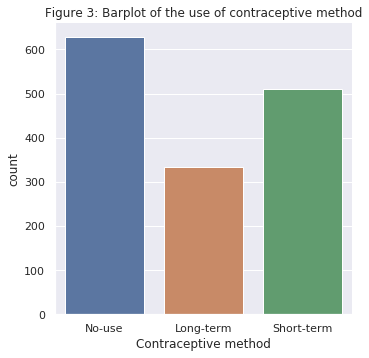

In [20]:
sns.set(style="darkgrid")
g = sns.catplot(x="c_method", data = df_labelled, kind="count", saturation=0.7)
plt.title("Figure 3: Barplot of the use of contraceptive method")
plt.xlabel("Contraceptive method")
plt.show()

Figure 4 shows that most of people surveyed in the sample has a high standard of living, only a handful number of people had a low standard of living index.

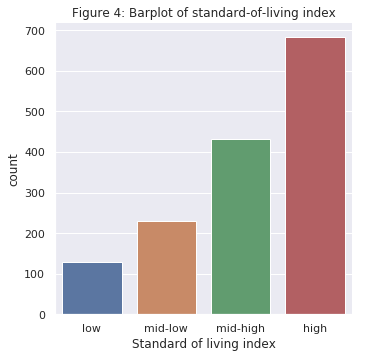

In [21]:
g = sns.catplot(x="living_index", data = df_labelled, kind="count", saturation=0.7,
               order = ['low', 'mid-low','mid-high', 'high'])
plt.title("Figure 4: Barplot of standard-of-living index")
plt.xlabel("Standard of living index")
plt.show()

Figure 5 depicts that husband's Occupation 3 was the most common occupation in the dataset. Very few husbands belonged to the category 4 amongst all the occupation in the category of "Huband's Occupation".

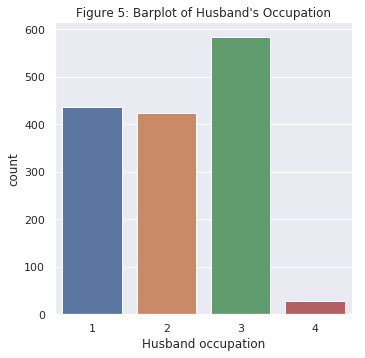

In [22]:
g = sns.catplot(x="husband_occupation", data = df_labelled, kind="count", saturation=0.7)
plt.title("Figure 5: Barplot of Husband's Occupation")
plt.xlabel("Husband occupation")
plt.show()

## 6.2 Two variable plots <a class="anchor" id="6.2"></a>

In order to find out if there are any differences in the level of education between the Husband and wife, a horizontal barplot was plotted. Figure 6 illustrates that there were more wifes who received less education then the husband. It could be one of the major factor for not being aware of the use of contraceptive method. Generally, across all the levels of education Husbands were more literate than the wives.

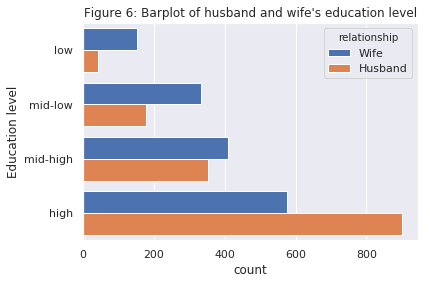

In [23]:
df_sex_w = pd.DataFrame(df_labelled["wife_education"].values, columns=['education'])
df_sex_w['relationship'] = "Wife"

df_sex_h = pd.DataFrame(df_labelled["husband_education"].values, columns=['education'])
df_sex_h['relationship'] = "Husband"

frames =[df_sex_w, df_sex_h]
df_education = pd.concat(frames)

g = sns.countplot(y="education", hue = 'relationship', data = df_education,
                order = ['low', 'mid-low','mid-high', 'high'], saturation=1)

plt.title("Figure 6: Barplot of husband and wife's education level")
plt.ylabel("Education level")
plt.show()

A histogram was plotted to observe the distribution of age of the wife with the use of contraceptive method. In the no-use category, we have a bi-modal distribution. Most of the wives in the age bracket 24-26 and 44-47 did not use any method of contraceptive. In the short-term use category, the histogram is right skewed which explains that in the age bracket 24-29 most of the wives adopted short term contraceptive methods. There is a normal distribution for the long-term use category and the wives in the age bracket 33-38 mostly adopted the long-term contraceptive methods.

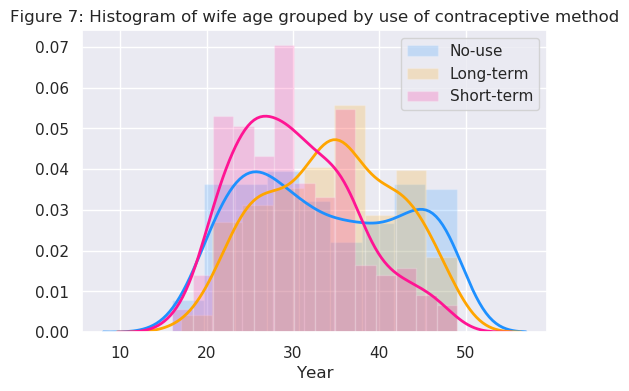

In [24]:
# Code adapted from https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

x1 = df_labelled[df_labelled.c_method=='No-use']['wife_age']
x2 = df_labelled[df_labelled.c_method=='Long-term']['wife_age']
x3 = df_labelled[df_labelled.c_method=='Short-term']['wife_age']

kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})

plt.figure(figsize=(6,4), dpi= 100)
sns.distplot(x1, color="dodgerblue", label="No-use", **kwargs)
sns.distplot(x2, color="orange", label="Long-term", **kwargs)
sns.distplot(x3, color="deeppink", label="Short-term", **kwargs)
plt.title("Figure 7: Histogram of wife age grouped by use of contraceptive method")
plt.xlabel("Year")
plt.legend();

It is observed in figure 8 that most of the wives had 1-6 number of children. It should also be noted that majority of the wives who had no children did not use any contraceptive methods. Further investigations can be explored to know the reasons. Wives who had more than 3 children adopted short-term and long-term contraceptive measures.

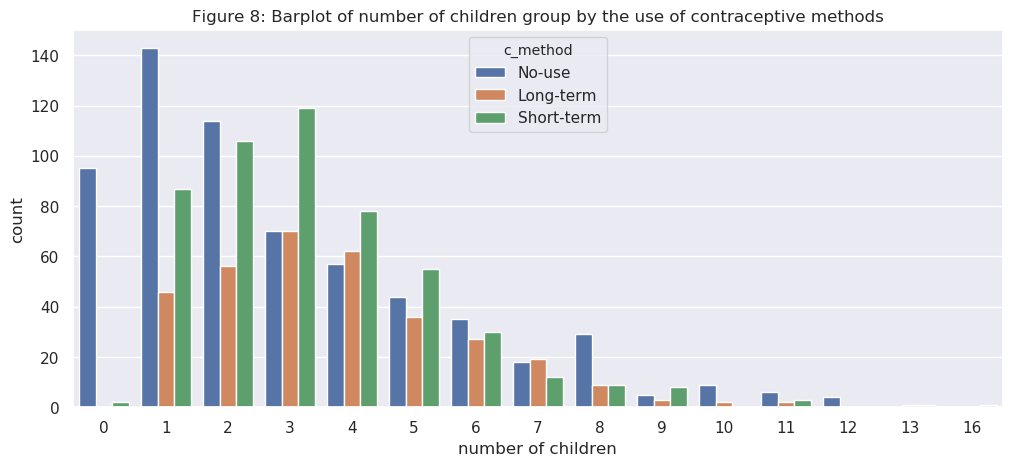

In [25]:
plt.figure(figsize=(12,5), dpi= 100)
g = sns.countplot(x="num_children", hue = 'c_method', data = df_labelled, saturation=0.8)
plt.title("Figure 8: Barplot of number of children group by the use of contraceptive methods")
plt.xlabel("number of children")
plt.show()

According to the heat-map in figure 9, most of the wife in the age bracket 21 and 25 had only one child. In general sense, most of the data points were concentrated in the age bracket 20-27 and had 1-3 children. Very few wives were above the age 42 and had more than 4 children.

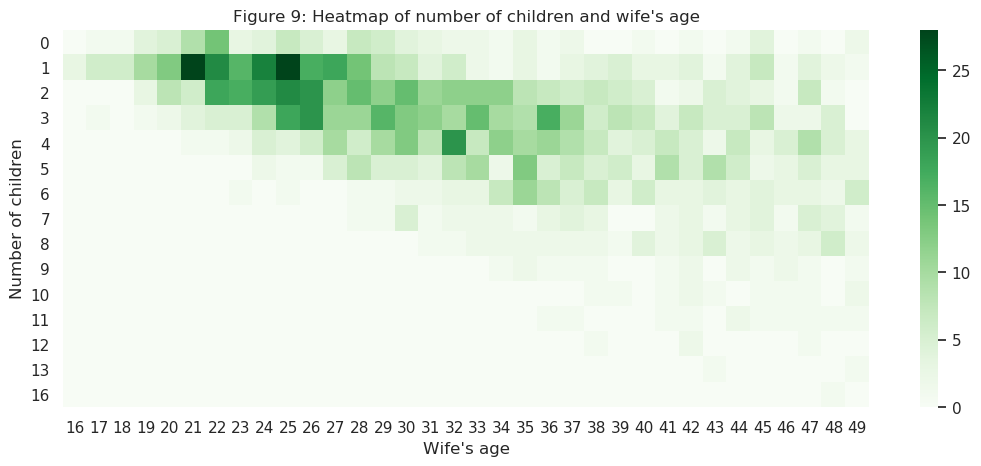

In [26]:
#Generate matrix of count of num_children and mother's age
matrix_age = pd.crosstab(df_labelled['num_children'], df_labelled['wife_age'], rownames=['Number of children'], 
                         colnames=["Wife's age"])
plt.figure(figsize=(13,5), dpi= 100)
ax = sns.heatmap(matrix_age, cmap="Greens")
plt.title("Figure 9: Heatmap of number of children and wife's age")
plt.yticks(rotation=0) 
plt.xticks(rotation=0) 
plt.show()

## 6.3 Three variable plots <a class="anchor" id="6.3"></a>

A side by side barchart was plotted to find the relationship between the Wife's religion, the contraceptive methods used and the wife's level of education. It can be seen from the graph below that most of the wives were muslims and very few had received lower levels of education. It is observed that, while the wives received a high level of education most of them resorted to short and long term contraceptive methods.

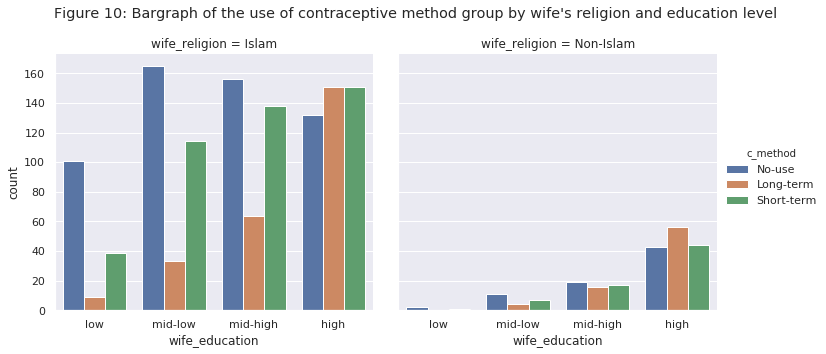

In [27]:
g = sns.catplot(x="wife_education", hue="c_method", col="wife_religion",
            data = df_labelled, kind="count",
            order = ['low', 'mid-low','mid-high', 'high'])

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Figure 10: Bargraph of the use of contraceptive method group by wife's religion and education level")  
plt.show()

It is observed in figure 11 that most of the wives had a good media exposure. However, the graph depicts the ineffectiveness of the role of social media as still the wives did not use any methods of contraceptives. However, as the level of education increases many of them resorted to short and long-term contraceptive methods.

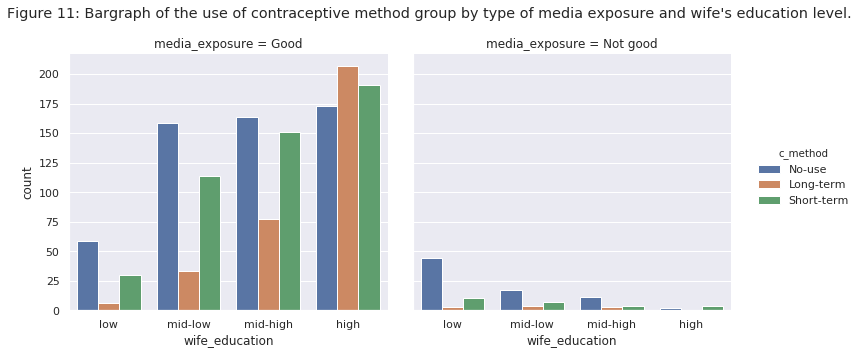

In [28]:
g = sns.catplot(x="wife_education", hue="c_method", col="media_exposure",
            data = df_labelled, kind="count",
            order = ['low', 'mid-low','mid-high', 'high'])

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Figure 11: Bargraph of the use of contraceptive method group by type of media exposure and wife's education level.") 
plt.show()

It is observed that most of the husbands had good media exposure. Ideally, with good media exposure the family would resort to adoption of short or long term contraceptive methods, however, it was not the case here. Additionally, as the level of education increased more wives adopted the use of short and long-term contraceptive methods. Thus, it can be concluded that education has a direct impact on the choice of contraceptive methods.

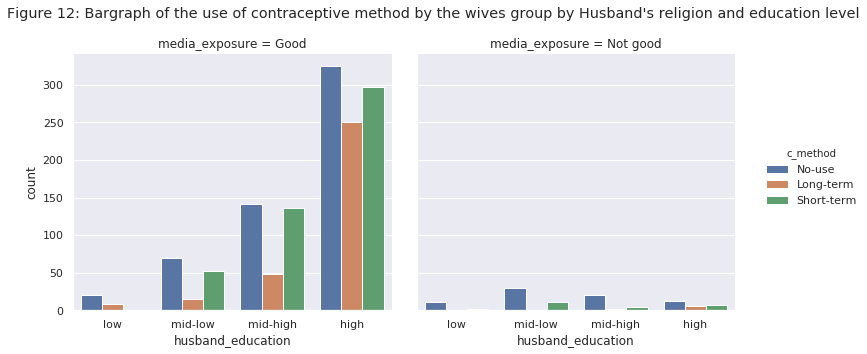

In [29]:
g = sns.catplot(x="husband_education", hue="c_method", col="media_exposure",
            data = df_labelled, kind="count",
            order = ['low', 'mid-low','mid-high', 'high'])

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Figure 12: Bargraph of the use of contraceptive method by the wives group by Husband's religion and education level") 
plt.show()

In order to explore the impact of level of income on the use of contraceptive methods, both the husband's occupation and the wife's employment status is taken into consideration. It is noticed in figure 13 that most of the wives were not working and most of the husband belonged to occupation category 1-3. Maximum wives did not use any methods of contraceptives when the husband's occupation was in the 2 and 3 category. When the husbands had occupation 1 considerable amount of wives resorted to short and long term contraceptive methods.

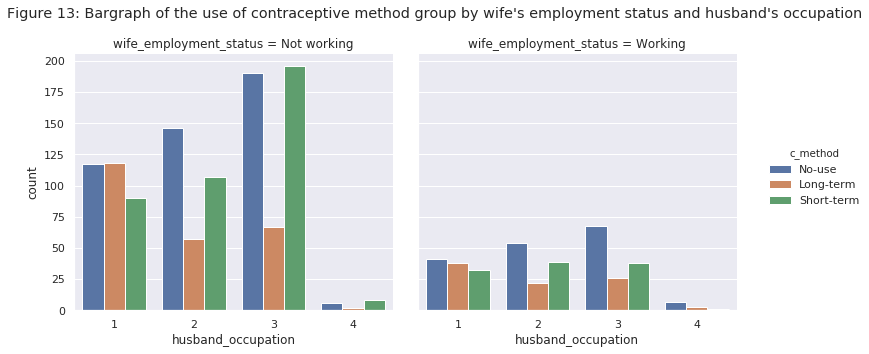

In [30]:
g = sns.catplot(x="husband_occupation", hue="c_method", col='wife_employment_status',
            data = df_labelled, kind="count")

plt.subplots_adjust(top=0.85)
g.fig.suptitle("Figure 13: Bargraph of the use of contraceptive method group by wife's employment status and husband's occupation") 
plt.show()

# 7. Data modelling <a class="anchor" id="7"></a>

The modelling process is divided in three phases: 

* In the first phase, the feature selection of the descriptive variables was performed using three filter methods and a wrapper method. Later, top five descriptive features were selected based on the SPSA method.

* In the second phase, four predicting algorithms were chosen: K-Nearest Neighbours (KNN), Decision Tree (DT), Random Forest (RF) and Naive Bayes (NB). It is noticed that each algorithm has its own parameters used for model fitting. Therefore, a Grid Search algorithm was implemented for hyperparameter fine-tuning process and model fitting. During this process, the best models were identified based on their accuracy scores.

* In the third phase, the models were evaluated based on Stratified k-Fold Cross Validation on the test set, using the average accuracy score metric. Finally a paired t-test was conducted to compare the metric scores between the best models.

Performing hold-out-sampling by siplitting the dataset into 70% for training and 30% for testing.

In [31]:
from sklearn.model_selection import train_test_split
Data = Data_df.values
target = target_df.values
D_train, D_test, t_train, t_test = train_test_split(Data, target, test_size = 0.3, random_state=999)

## 7.1 Feature selection <a class="anchor" id="7.1"></a>

Generally, feature selection is performed to reduce the dimensionality of the dataset and select the best descriptive features that explain the target feature. In this project it will be used to evaluate if the prediction score (obtain with all the features) can be improved by selecting the top five descriptive features.

For all the feature selection methods below, it is important to use stratified k-fold Cross Validation. So, it is possible to have an equal representation of the classes in the train and the test set, and to remove any form of biasness. In order to have a control on the randomness, a seed of value 999 is defined. Also, facilitates the comparison between methods using paired samples t-test.

The Python code of this section is adapted from the source "SK Part 2" (Vural Aksakalli, 2020).

This project is going to select the five (5) most important features that determine the target feature. The scoring metric is accuracy and the wrapper is 1 nearest neighbour.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
num_features = 5
scoring_metric = 'accuracy'
#Wrapper: 
clf = KNeighborsClassifier(n_neighbors=1)

Also, the number of cross validation splits is specified to 5 using `StratifiedKFold`.

In [33]:
from sklearn import feature_selection as fs
from sklearn.model_selection import StratifiedKFold
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

Then, the performance of the selected classifier is evaluated using cross validation and the test data with all the features.

In [34]:
from sklearn.model_selection import cross_val_score
cv_results_full = cross_val_score(estimator=clf,
                             X=D_test,
                             y=t_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)

cv_results_full

array([0.41111111, 0.41573034, 0.42696629, 0.47126437, 0.45977011])

With all of the features and with the 1-nearest neighbor classifier as our wrapper, the K-nn model has achieved an average accuracy of 43.7%.

In [35]:
cv_perf_full = cv_results_full.mean().round(3)
cv_perf_full

0.437

### 7.1.1 Mutual Information <a class="anchor" id="7.1.1"></a>
In this model, the relationship between the descriptive features and the target feature is based on the concept of entropy. In this method the wrapper is not used unlike the F-score method. The top 5 features are selected using the Mutual Information method on the train data.

In [36]:
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(D_train, t_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]

# Check the top 5 features
best_features_mutual_info = Data_df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['num_children', 'wife_education_4', 'wife_education_1',
       'wife_religion', 'wife_age'], dtype=object)

In [37]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.07970369, 0.05518192, 0.04082334, 0.03479099, 0.0298104 ])

In  figure 14,  it is observed that the feature num_children explains the most target feature and the wife_age explains the least in our top 5 feature selection method based on Mutual Information.

In [38]:
# This function plot the feature and its importance
figure_num =  14
def plot_importance(best_features, feature_importances, method_name, figure_num):
    df_plot = pd.DataFrame({'features': best_features,'importances': feature_importances})
    plt.figure(figsize=(7,3), dpi= 100)
    sns.barplot(y="features", x="importances", data = df_plot)
    plt.title("Figure "+ str(figure_num) +": "+ method_name + ' Feature Importances')
    plt.xticks(rotation=0) 
    plt.show()

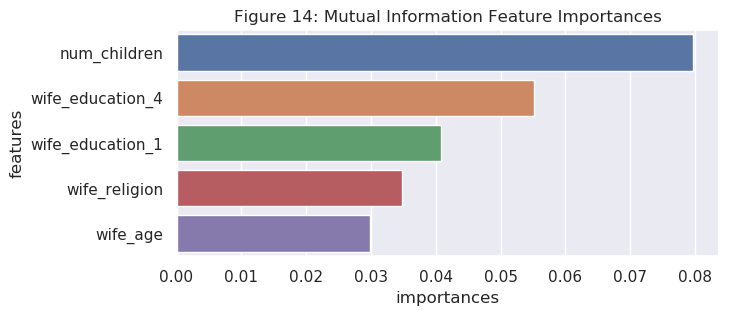

In [39]:
# Call the plot function
plot_importance(best_features_mutual_info, feature_importances_mutual_info, "Mutual Information", figure_num)
figure_num = figure_num +1

Then, the model performance is evaluated using cross validation, the wrapper and the test data with only 5 features selected by Mutual Information. The MI model has achieved an average accuracy of 49.3% which is better than the score of the full features.

In [40]:
cv_results_mutual_info = cross_val_score(estimator=clf,
                             X=D_test[:, fs_indices_mutual_info],
                             y=t_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)

cv_perf_mutual_info = cv_results_mutual_info.mean().round(3)
cv_perf_mutual_info

0.493

### 7.1.2 Random Forest Importance  <a class="anchor" id="7.1.2"></a>
The random forest importance (RFI) method is a filter feature selection method that uses the total decrease in node impurities from splitting on a particular feature as averaged over all decision trees in the ensemble. For classification, the node impurity is measured by the Gini index and for regression, it is measured by residual sum of squares (Vural Aksakalli, 2020, "SK Part 2").

Performing the RFI feature selection using the 100 trees.

In [41]:
from sklearn.ensemble import RandomForestClassifier

num_features = 5
model_rfi = RandomForestClassifier(n_estimators=100, random_state=999)
model_rfi.fit(D_train, t_train)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = Data_df.columns[fs_indices_rfi].values
best_features_rfi

array(['wife_age', 'num_children', 'wife_employment_status',
       'wife_religion', 'wife_education_4'], dtype=object)

In [42]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.34658162, 0.2385785 , 0.04846028, 0.03220545, 0.03179014])

In figure 15, it is observed that the feature wife_age explains the most target feature and the wife_education explains the least in our top 5 feature selection method based on RFI.

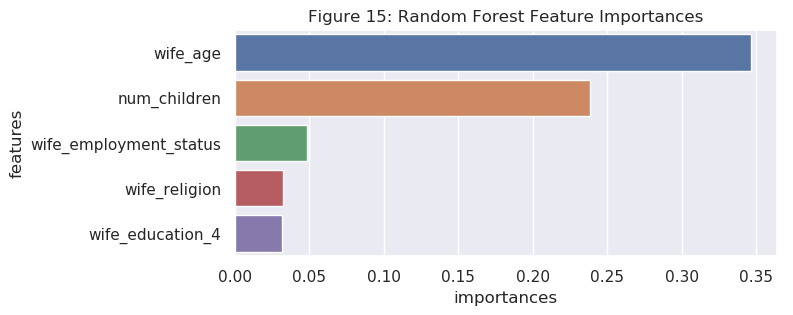

In [43]:
# Call the plot function
plot_importance(best_features_rfi, feature_importances_rfi, "Random Forest", figure_num)
figure_num = figure_num +1

Then, the model performance is evaluated using cross validation, the wrapper and the test data with only 5 features selected by RFI. The model has achieved an average accuracy of 42.8% which is better than the model with full features and obtaining more or less the same accuracy than MI model.

In [44]:
cv_results_rfi = cross_val_score(estimator=clf,
                             X=D_test[:, fs_indices_rfi],
                             y=t_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_perf_rfi = cv_results_rfi.mean().round(3)
cv_perf_rfi

0.428

### 7.1.3 F-Score  <a class="anchor" id="7.1.3"></a>
The relationship between the target and the descriptive feature is based on the F-Distribution. In this method the wrapper is not deployed. In some cases, the F-Score will be "NaN" for some features due to technical reasons (related to the nature of the F-distribution). For this reason, we will convert any "NaN" value to zero for a correct result via the np.nan_to_num() method (Vural Aksakalli, 2020, "SK Part 2").

In [45]:
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(D_train, t_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]

# Check the top 5 features
best_features_fscore = Data_df.columns[fs_indices_fscore].values
best_features_fscore

array(['wife_education_4', 'husband_occupation_1', 'wife_age',
       'husband_education_4', 'living_index_4'], dtype=object)

In [46]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([43.85158884, 23.68244566, 19.49291695, 18.45163221, 16.39759114])

In figure 16, it is observed that the feature wife_education_4 explains most of the target feature and the living_index_4 explains the least in our top 5 feature selection method based on F-Score. Here, because of the One-Hot-Encoding there is (_some number) pattern in the variables plotted in the graph.

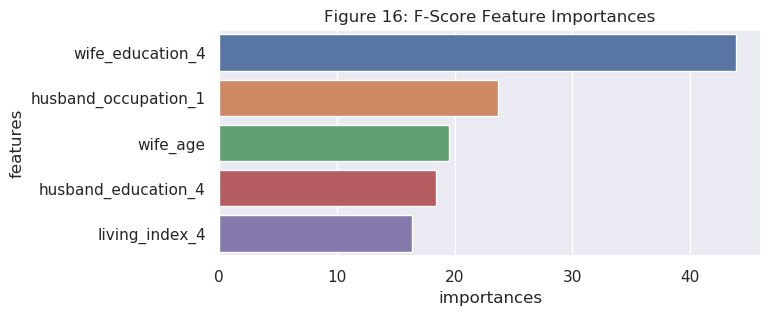

In [47]:
# Call the plot function
plot_importance(best_features_fscore, feature_importances_fscore, "F-Score", figure_num)
figure_num = figure_num +1

Then, the model performance is evaluated using cross validation, the wrapper and the test data with only 5 features selected by F-Score. The F-Score model has achieved an average accuracy of 41.2% which is better than selection of the full features and obtaining more or less the same accuracy as the previous models.

In [48]:
cv_results_fscore = cross_val_score(estimator=clf,
                             X=D_test[:, fs_indices_fscore],
                             y=t_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_perf_fscore = cv_results_fscore.mean().round(3)
cv_perf_fscore

0.412

### 7.1.4 SPSA  <a class="anchor" id="7.1.4"></a>

"Simultaneous Perturbation Stochastic Approximation (SPSA) is a new wrapper-based feature selection method that uses binary stochastic approximation" (Vural Aksakalli, 2020, "SK Part 2").

This section uses an Python implementation of SPSA based on V. Aksakalli and M. Malekipirbazari (Pattern Recognition Letters, 2016) and Zeren D. Yenice et al. (https://arxiv.org/abs/1804.05589, 2018). The Python file is "SpFtSel.py" and can be found an be found on github: https://github.com/vaksakalli/spsaml_py.

Defining a SpFtSel object and 'accuracy' as our performance metric.

In [49]:
from SpFtSel import SpFtSel

sp_engine = SpFtSel(D_train, t_train, clf, 'accuracy')

In [50]:
np.random.seed(999)
sp_output = sp_engine.run(num_features, run_mode='short').results

spFtSel-INFO: Algorithm run mode: short
spFtSel-INFO: Wrapper: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')
spFtSel-INFO: Scoring metric: accuracy
spFtSel-INFO: Number of observations: 1031
spFtSel-INFO: Number of features available: 21
spFtSel-INFO: Number of features to select: 5
spFtSel-INFO: iter_no: 0, num_ft: 5, value: 0.42, st_dev: 0.038, best: 0.42 @ iter_no 0
spFtSel-INFO: iter_no: 5, num_ft: 5, value: 0.476, st_dev: 0.027, best: 0.482 @ iter_no 3
spFtSel-INFO: iter_no: 10, num_ft: 5, value: 0.452, st_dev: 0.032, best: 0.482 @ iter_no 3
spFtSel-INFO: iter_no: 15, num_ft: 5, value: 0.474, st_dev: 0.039, best: 0.49 @ iter_no 13
spFtSel-INFO: iter_no: 20, num_ft: 5, value: 0.467, st_dev: 0.032, best: 0.491 @ iter_no 17
spFtSel-INFO: iter_no: 25, num_ft: 5, value: 0.485, st_dev: 0.033, best: 0.494 @ iter_no 22
spFtSel-INFO: iter_no: 30, num_ft: 5, value: 0.498,

In [51]:
fs_indices_spsa = sp_output.get('features')
fs_indices_spsa

array([ 0,  8, 11,  1,  4])

In [52]:
best_features_spsa = Data_df.columns[fs_indices_spsa].values
best_features_spsa

array(['wife_age', 'wife_education_4', 'husband_education_3',
       'num_children', 'media_exposure'], dtype=object)

In [53]:
feature_importances_spsa = sp_output.get('importance')
feature_importances_spsa

array([0.56354632, 0.5571026 , 0.37529496, 0.37472056, 0.19627113])

In figure 17, it is observed that the feature wife_age explains most of the target feature and the media_exposure explains the least in our top 5 feature selection method based on SPSA. 

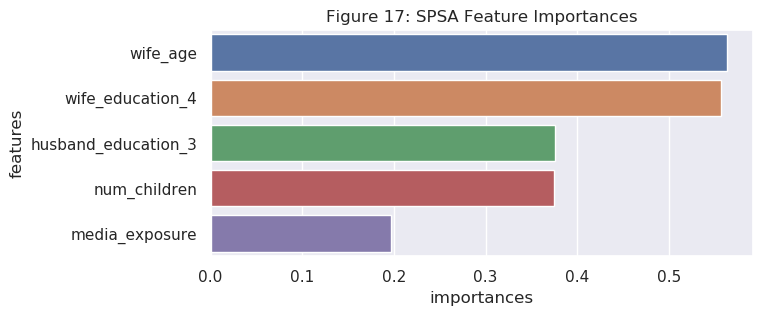

In [54]:
# Call the plot function
plot_importance(best_features_spsa, feature_importances_spsa, "SPSA", figure_num)
figure_num = figure_num +1

Then, the model performance is evaluated using cross validation, the wrapper and the test data with only 5 features selected by SPSA. The model has achieved an average accuracy of 50.4% which is better than selection of the full features.

In [55]:
cv_results_spsa = cross_val_score(estimator=clf,
                             X=D_test[:, fs_indices_spsa],
                             y=t_test, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_perf_spsa = cv_results_spsa.mean().round(3)
cv_perf_spsa

0.504

### 7.1.5 Performance Comparison Using Paired T-Tests  <a class="anchor" id="7.1.5"></a>
    

Firstly, a summary of the mean accuracy scores of the different methods is presented below. It is observed that the highest performance for the feature selection is yield by SPSA with score of 50.4%.

In [56]:
print(f'Full Set of Features (with {D_train.shape[1]} Features):', cv_perf_full)
print(f'Feature Selection with {num_features} Features:')
print('Mutual Information:', cv_perf_mutual_info)
print('RFI:', cv_perf_rfi)
print('F-Score:', cv_perf_fscore)
print('SPSA:', cv_perf_spsa)

Full Set of Features (with 21 Features): 0.437
Feature Selection with 5 Features:
Mutual Information: 0.493
RFI: 0.428
F-Score: 0.412
SPSA: 0.504


Stratified cross-validation is used for performance assessment. However, cross-validation is a random process and it is important to have a need statistical tests in order to determine if any difference between the performance of any two feature selection methods is statistically significant; or if it is within the sample variation and the difference is statistically insignificant (Vural Aksakalli, 2020, "SK Part 2").

The random state has been fixed for all the cross-validation procedures, all feature selection methods were fitted and then tested on exactly the same data partitions. This indicates that the experiments were actually paired. Conducting experiments in a paired fashion reduces the variability significantly compared to conducting experiments in an independent fashion (Vural Aksakalli, 2020, "SK Part 2").

The best performance was accomplished by SPSA method. Therefore, this method is going to be evaluated with the other feature selecting methods by conducting a paired t-tests to observe if the differences between them are statistically significant or not. 

In [57]:
from scipy import stats
print(stats.ttest_rel(cv_results_spsa, cv_results_mutual_info).pvalue.round(3))
print(stats.ttest_rel(cv_results_spsa, cv_results_rfi).pvalue.round(3))
print(stats.ttest_rel(cv_results_spsa, cv_results_fscore).pvalue.round(3))

0.667
0.014
0.025


The difference in accuracy between SPSA and the two other methods namely Random Forest Importance (RFI) and F-score  is significant with p-value 0.014 and 0.025 respectively (at 5% significance level). However, the paired t test shows that there is not statistically significance difference between SPSA and mutual information method, with p-value 0.667 (at 5% significance level). In conclusion, we can select either SPSA or Mutual information as feature selecting approach. So, SPSA is chosen as feature selecting method because it has the highest performance metric amongst the other models.

Now, another paired t test is performed between the full dataset and SPSA method. The test states:

**H0: The accuracy achieved with all the features is equal to the accuracy achieved with 5 features of SPSA**

**H1: The accuracy achieved with all the features is not equal to the accuracy achieved with 5 features of SPSA**

In [58]:
print(stats.ttest_rel(cv_results_full, cv_results_spsa).pvalue.round(3))

0.075


It is observed that the p-value is greater than the significance level at 5%. Therefore, we fail to reject the null hypothesis. It means that the accuracy achieved with only 5 features (with 1 nearest neighbour) performs at a similar level when all the features in the data set are considered. It is therefore desirable to consider only the top 5 features to build the predictive models in the next stage.

The selected features are as follows: 'wife_age', 'wife_education_4', 'husband_education_3', 'num_children' and 'media_exposure'. 

Now, new datasets that contain only the selected features are created. The number of features are reduced, from 21 to 5 for both training and testing datasets.

In [59]:
# Reduce the number of features from 21 to 5 for the training and testing datasets
D_train_fs = D_train[:, fs_indices_spsa]
D_test_fs  = D_test[:, fs_indices_spsa]

## 7.2 Hyperparameter fine-tuning  <a class="anchor" id="7.2"></a>
After splitting the full set into training and test datasets and selecting the most relevant 5 descriptive features, cross validation strategy via "grid search" is implemented to identify optimal hyperparameter values for selected machine learning algorithms. The Python code of this section is adapted from the source "SK Part 3" (Vural Aksakalli, 2020).

The main goal is to perform model fitting and hyperparameter tuning via cross validation using the training dataset. The selected classifiers algorithms are:
* k-Nearest Neighbors (KNN)
* Decision Tree (DT)
* Random Forest (RF) 
* Naive Bayes (NB)

Grid search is the most commonly used strategy used to find the best set of model parameters that maximizes the validating measure, in this case the scoring metric is model **accuracy**. It "searches through all the combinations of hyperparameters" (Vural Aksakalli, 2020, "SK Part 3") in the training step and calculates the accuracy of each model. At the end model that yields the highest score will be selected as the best and used for prediction and model evaluation.

A stratified 5-fold cross validation is used, meaning that the training dataset is randomly splitted into 5 partitions with equal size. The "stratified" concept allows to preserve the percentage of samples for each class (Scikit-learn developers, 2019). Then, one partition is used for testing while the rest is used to train the model. This process repeats five times using each partition as validating dataset. Each model will have a metric score and at the end the average of the five test accuracies is used to describe the overall performance of the model with the specific hyperparameters. 

One of the advantages of using cross validation is that it decreases the risk of having "lucky split", where the model performs and generalizes well to the test data but not with new observations. Also, cross-validation is useful when there is not too much information to work with because it allows to perform model validation within the same training data set.

The `StratifiedKFold` module from sklearn package is used to generate a cross-validation training method with 5 folds. "It ensures that the percentage of the class labels in both train and test datasets are the same as the percentage in the full dataset in each cross-validation repetition" (Vural Aksakalli, 2020, "SK Part 3").

In [60]:
from sklearn.model_selection import StratifiedKFold

cv_method_train = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

### 7.2.1 K-Nearest Neighbors  <a class="anchor" id="7.2.1"></a>
A dictionary of possible K-NN parameters is defined for the grid search. The range of number of neighbors is between 1 and 7, and the distance parameter `p` is set to 1 (Manhattan) and 2 (Euclidean).

Then, a `KNeighborsClassifier()` and `params_KNN` are passed as the model and the hyperparameters into the `GridSearchCV()` function. Also, the previous stratified CV method is included in `cv=cv_method`. Finally, the scoring metric (accuracy) is passed to be optimized.

In [61]:
from sklearn.model_selection import GridSearchCV

params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2]}

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method_train,
                      verbose=1,
                      scoring=scoring_metric, 
                      return_train_score=True)

The grid search configuration is stored in `gs_KNN` and then all the possible models are fitted using the training dataset: `D_train_fs` and `t_train`.

In [62]:
gs_KNN.fit(D_train_fs, t_train);

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    2.1s finished


The results and scores are stored inside the Grid Search structure. After the cross validation via grid search process is finished, the best hyperparameters for the model KNN are number of neighbors equal to 6 and Manhattan distance (p=1). This model has accuracy score equals to 0.536 .

In [63]:
gs_KNN.best_params_

{'n_neighbors': 6, 'p': 1}

In [97]:
np.round(gs_KNN.best_score_, 3)

0.536

Then a data frame is created with the evaluated parameters and their respective scores. A new column is defined as `metric`, that contains the label of the distance p: Manhattan or Euclidean.

In [65]:
results_KNN_df = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN_df['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN_df['metric'] = results_KNN_df['p'].replace([1,2], ["Manhattan", "Euclidean"])

Finally, the results are displayed in figure 18. The best mean accuracy performance is achieved by the parameters: number of neighbors = 6 and Manhattan distance (p=1). It is noticed that Manhattan distance outperforms the euclidean distance as the input parameter.

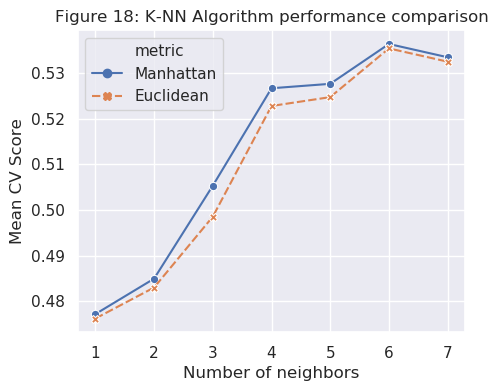

In [66]:
plt.figure(figsize=(5,4), dpi= 100)
sns.lineplot(x="n_neighbors", y="test_score", hue='metric', style="metric",
                  markers=True, data=results_KNN_df, ci=None)
plt.title('Figure 18: K-NN Algorithm performance comparison')
plt.xlabel("Number of neighbors")
plt.ylabel("Mean CV Score")
plt.show()

### 7.2.2 Decision Tree <a class="anchor" id="7.2.2"></a>

A dictionary of possible Decision Tree parameters is defined for the grid search. For fine-tuning, it is considered the next hyperparameters:
* **Criterion:** gini or entropy.
* **max_depth:** values in {3, 4, 5, 6, 7, 10, 12} 
* **min_samples_split:** values in {2, 5, 15, 20, 25}

Then, a `DecisionTreeClassifier()` and `params_DT` are passed as the model and the hyperparameters into the `GridSearchCV()` function. Also, the previous stratified CV method is included in `cv=cv_method`. Finally, the scoring metric (accuracy) is passed to be optimized.

The grid search configuration is stored in `gs_DT` and then all the possible models are fitted using the training dataset: `D_train_fs` and `t_train`.

In [67]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [3, 4, 5, 6, 7, 10, 12],
             'min_samples_split': [2, 5, 15, 20, 25]}
            
gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method_train,
                     verbose=1, 
                     scoring=scoring_metric)

gs_DT.fit(D_train_fs, t_train);

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    2.3s finished


The results and scores are stored inside the Grid Search structure. After the cross validation via grid search process is finished, the best hyperparameters for the model DT are "gini" criterion, max_depth equals to 4 and min_samples_split equals to 2. This model has accuracy score equals to 0.567 .

In [68]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [98]:
np.round(gs_DT.best_score_, 3)

0.567

A data frame is created with the evaluated parameters (criterion, max_depth and min_samples_split) and their respective scores.

In [70]:
results_DT_df = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT_df['test_score'] = gs_DT.cv_results_['mean_test_score']

The results are displayed and compared in figure 19. The best mean accuracy performance is achieved by the parameters: gini criterion, maximum depth = 4.

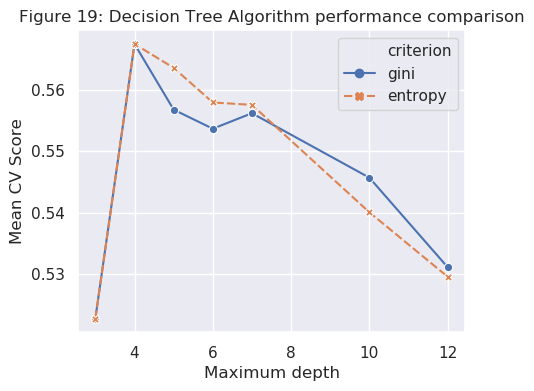

In [71]:
plt.figure(figsize=(5,4), dpi= 100)
sns.lineplot(x="max_depth", y="test_score", hue='criterion', style="criterion",
                  markers=True, data=results_DT_df, ci=None)
plt.title('Figure 19: Decision Tree Algorithm performance comparison')
plt.xlabel("Maximum depth")
plt.ylabel("Mean CV Score")
plt.show()

### 7.2.3 Random Forest <a class="anchor" id="7.2.3"></a>

Fit and fine-tune a Random Forest model using the train data. For fine-tuning, consider n_estimators values in {100, 250, 500} and max_depth values in {3, 5, 7, 10, 12}. Also visualize the tuning results.

A dictionary of possible Random Forest parameters is defined for the grid search. For fine-tuning, it is considered the next hyperparameters:
* **n_estimators:** values in {50, 100, 200}
* **max_depth:** values in {3, 4, 5, 8, 10} 

Then, a `RandomForestClassifier()` and `params_RF` are passed as the model and the hyperparameters into the `GridSearchCV()` function. Also, the previous stratified CV method is included in `cv=cv_method`. Finally, the scoring metric (accuracy) is passed to be optimized.

The grid search configuration is stored in `gs_RF` and then all the possible models are fitted using the training dataset: `D_train_fs` and `t_train`.

In [72]:
rf_classifier = RandomForestClassifier(random_state=999)

params_RF = {'n_estimators': [50, 100, 200],
             'max_depth': [3, 4, 5, 8, 10]}

gs_RF = GridSearchCV(estimator=rf_classifier, 
                     param_grid=params_RF, 
                     cv=cv_method_train,
                     verbose=1,
                     n_jobs = -2,
                     scoring= scoring_metric)

gs_RF.fit(D_train_fs, t_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done  75 out of  75 | elapsed:   40.1s finished


The results and scores are stored inside the Grid Search structure. After the cross validation via grid search process is finished, the best hyperparameters for the model RF are max_depth equals to 8 and n_estimators equals to 200. This model has accuracy score equals to 0.576 .

In [73]:
gs_RF.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [99]:
np.round(gs_RF.best_score_, 3)

0.576

A data frame is created with the evaluated parameters (max_depth and n_estimators) and their respective scores.

In [75]:
results_RF_df = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF_df['test_score'] = gs_RF.cv_results_['mean_test_score']

The results are displayed and compared in figure 20. The best mean accuracy performance is achieved by the parameters: maximim depth = 8 and number of estimators equals 200.

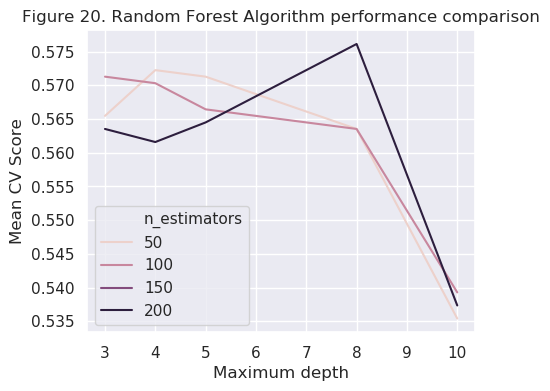

In [76]:
plt.figure(figsize=(5,4), dpi= 100)
sns.lineplot(x="max_depth", y="test_score", hue='n_estimators', data=results_RF_df, ci=None)
plt.title('Figure 20. Random Forest Algorithm performance comparison')
plt.xlabel("Maximum depth")
plt.ylabel("Mean CV Score")
plt.show()

### 7.2.4 Gaussian Naive Bayes <a class="anchor" id="7.2.4"></a>

A dictionary of possible Gaussian Naive Bayes parameters is defined for the grid search. For fine-tuning, it is considered var_smoothing values in `np.logspace(1,-2, num=50)`.

Then, a `GaussianNB()` and `params_NB` are passed as the model and the hyperparameters into the `GridSearchCV()` function. Also, the previous stratified CV method is included in `cv=cv_method`. Finally, the scoring metric (accuracy) is passed to be optimized.

The grid search configuration is stored in `gs_NB` and then all the possible models are fitted using the training dataset: `D_train_fs` and `t_train`. A power transformation is performed to make each feature in the training set more or less normally distributed, so the assumption of Gaussian NB normal distribution is fulfilled  (Vural Aksakalli, 2020, "SK Part 3").

In [77]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(1,-2, num=50)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method_train,
                     verbose=1, 
                     scoring=scoring_metric)

D_train_fs_transformed = PowerTransformer().fit_transform(D_train_fs)

gs_NB.fit(D_train_fs_transformed, t_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    1.8s finished


The results and scores are stored inside the Grid Search structure. After the cross validation via grid search process is finished, the best hyperparameters for the model NB are var_smoothing equals to 1.84 . This model has accuracy score equals to 0.563 .

In [78]:
gs_NB.best_params_

{'var_smoothing': 1.8420699693267164}

In [100]:
np.round(gs_NB.best_score_, 3)

0.563

A data frame is created with the evaluated parameter `var_smoothing` and their respective scores.

In [80]:
results_NB_df = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB_df['test_score'] = gs_NB.cv_results_['mean_test_score']

Then, the results are displayed and compared in figure 21. The best mean accuracy performance is achieved by setting the variance smoothing parameter to 1.84 .

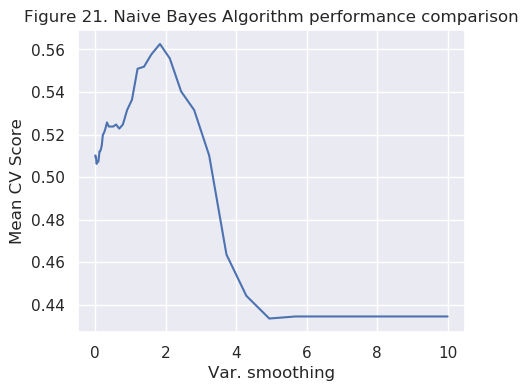

In [81]:
plt.figure(figsize=(5,4), dpi= 100)
sns.lineplot(x="var_smoothing", y="test_score", data=results_NB_df, ci=None)
plt.title('Figure 21. Naive Bayes Algorithm performance comparison')
plt.xlabel("Var. smoothing")
plt.ylabel("Mean CV Score")
plt.show()

## 7.3 Multinomial Evaluation Metrics <a class="anchor" id="7.3"></a>

The contraceptive data has 3 categorical labels and is treated as multinomial classification problem. So, for each model, its evaluation is performed using the hold-out test data. The reports of evaluation metrics for each predicting model are presented below.
 
It is important to consider the average class accuracy (using arithmetic mean) because this is a multinomial class problem. The accuracy score is calculated as well.

For the metrics reports, micro averaging is the input parameter because it takes into account the class label imbalance. It is also important to note here that micro F1 Score takes the arithmetic mean of micro recall and micro precision.
 
While evaluating the model based on test set, it is often noticed that the model performance could be influenced by a lucky split. Therefore, to avoid such discrepancies a more powerful approach is adopted, namely the K-Fold cross validation.

The Python code of this section is adapted from the source "SK Part 4" (Vural Aksakalli, 2020).

### 7.3.1 Model evaluation with test set <a class="anchor" id="7.3.1"></a>

Henceforth, while each of the models are being evaluated, two lists are created, in the first list (`metrics_acc`) the accuracy scores are stored and in the second (`avg_accuracy`), the average accuracy scores are stored.

The predictions are calculated using the test data based on the K-NN model. Also, the metrics report is presented below.

In [104]:
from sklearn import metrics

metrics_acc = []
avg_accuracy = []

t_pred = gs_KNN.predict(D_test_fs)
metrics_acc.append(metrics.accuracy_score(t_test, t_pred))
avg_accuracy.append(metrics.balanced_accuracy_score(t_test, t_pred))

print(metrics.classification_report(t_test, t_pred))

              precision    recall  f1-score   support

           0       0.52      0.67      0.58       181
           1       0.43      0.36      0.39        98
           2       0.42      0.33      0.37       163

   micro avg       0.47      0.47      0.47       442
   macro avg       0.45      0.45      0.45       442
weighted avg       0.46      0.47      0.46       442



In the above table, it is observed that based on micro average the precision, recall and f1-score have the same value 0.47 .

Now, the predictions are calculated using the test data based on the Decision Tree model. The metrics report is presented below.

In [83]:
t_pred = gs_DT.predict(D_test_fs)
metrics_acc.append(metrics.accuracy_score(t_test, t_pred))
avg_accuracy.append(metrics.balanced_accuracy_score(t_test, t_pred))

print(metrics.classification_report(t_test, t_pred))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       181
           1       0.42      0.37      0.39        98
           2       0.51      0.55      0.53       163

   micro avg       0.55      0.55      0.55       442
   macro avg       0.53      0.52      0.52       442
weighted avg       0.55      0.55      0.55       442



In the above table, it is observed that the micro average metrics is 0.55, which represents an increase of performance compared with K-NN model.

Then, the predictions are calculated using the test data based on the Random Forest model. The metrics report is presented below.

In [84]:
t_pred = gs_RF.predict(D_test_fs)
metrics_acc.append(metrics.accuracy_score(t_test, t_pred))
avg_accuracy.append(metrics.balanced_accuracy_score(t_test, t_pred))

print(metrics.classification_report(t_test, t_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65       181
           1       0.44      0.36      0.40        98
           2       0.51      0.49      0.50       163

   micro avg       0.55      0.55      0.55       442
   macro avg       0.52      0.51      0.52       442
weighted avg       0.54      0.55      0.54       442



It is observed that the the micro average metrics is 0.55, which is the same as Decision Tree model.

The predictions are calculated using the test data based on the Naive Bayes model. The metrics report is presented below.

In [85]:
t_pred = gs_NB.predict(D_test_fs)
metrics_acc.append(metrics.accuracy_score(t_test, t_pred))
avg_accuracy.append(metrics.balanced_accuracy_score(t_test, t_pred))

print(metrics.classification_report(t_test, t_pred))

              precision    recall  f1-score   support

           0       0.70      0.25      0.37       181
           1       0.49      0.29      0.36        98
           2       0.43      0.85      0.57       163

   micro avg       0.48      0.48      0.48       442
   macro avg       0.54      0.46      0.44       442
weighted avg       0.55      0.48      0.44       442



In the above table, it is observed that the micro average metrics is 0.48, which represents a decrease of performance compared with the previous two models.

The table below, depicts the performance metrics obtained by each prediction model.

In [103]:
algorithms = ['k-NN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
df_metrics = pd.DataFrame({'Algorithm': algorithms, 'Accuracy': metrics_acc, 'Average class Accuracy': avg_accuracy})
df_metrics[['Accuracy', 'Average class Accuracy']] = df_metrics[['Accuracy', 'Average class Accuracy']].round(3)
df_metrics

,Algorithm,Accuracy,Average class Accuracy
0,k-NN,0.473,0.450
1,Decision Tree,0.550,0.522
2,Random Forest,0.545,0.515
3,Naive Bayes,0.480,0.462


The table shows the metric scores for two different evaluation metrics using the test dataset. For both metrics, the highest score was obtained by the Decision Tree model. 

### 7.3.2 Model evaluation using K-Fold cross validation <a class="anchor" id="7.3.2"></a>


In order to prevent any form of biasness or "lucky split", each model is is evaluated using the K-Fold Cross Validation and then, a statistical test is performed to generalize the comparison between the best model and the remaining models.

Implementing a stratified k-fold cross validation strategy allows to preserve the percentage of samples for each class (Scikit-learn developers, 2019). To control the randomness, a seed is defined equals to 999. This seed also facilitates the comparison between models using paired samples t-test. 

In order to have uniformity while evaluating the model, the scoring metric is "average class accuracy using arithmetic mean". 

The Python code of this section is adapted from the source "SK Part 3" (Vural Aksakalli, 2020).

In [107]:
from sklearn.model_selection import cross_val_score
cv_method_test = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)
scoring_metric = 'balanced_accuracy'

### K-NN model evaluation

The best model is obtained from the Grid Search `gs_KNN` and the results of cross validation using the test set are stored in `cv_results_KNN`. 

In [116]:
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                             X=D_test_fs,
                             y=t_test, 
                             cv=cv_method_test, 
                             scoring=scoring_metric)
cv_results_KNN

array([0.45132405, 0.4503367 , 0.55488215, 0.53289474, 0.47216131])

The average performance of the five folds is 0.492 .

In [118]:
cv_results_KNN.mean().round(3)

0.492

### Decision Tree  model evaluation
The best model is obtained from the Grid Search `gs_DT` and the results of cross validation using the test set are stored in `cv_results_DT`. 

In [119]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                 X=D_test_fs,
                                 y=t_test, 
                                 cv=cv_method_test, 
                                 scoring= scoring_metric)
cv_results_DT

array([0.54062244, 0.47912458, 0.57070707, 0.50572612, 0.54258041])

The average performance of the five folds is 0.528, which is greater than K-NN model.

In [120]:
cv_results_DT.mean().round(3)

0.528

### Random Forest model evaluation

The best model is retrieved from the Grid Search `gs_RF` and the results of cross validation using the test set are stored in `cv_results_RF`. 

In [122]:
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,
                                 X=D_test_fs,
                                 y=t_test, 
                                 cv=cv_method_test, 
                                 n_jobs=-2,
                                 scoring=scoring_metric)
cv_results_RF

array([0.48625444, 0.47895623, 0.54612795, 0.59058236, 0.54026559])

The average performance of the five folds is 0.528, which is similar to Decision Tree model.

In [121]:
cv_results_RF.mean().round(3)

0.528

### Naive Bayes model evaluation

The best model is obtained from the Grid Search `gs_NB` and the results of cross validation using the test set are stored in `cv_results_NB`. A power transformation is performed to make each feature in the test set more or less normally distributed, so the assumption of Gaussian NB normal distribution is fulfilled  (Vural Aksakalli, 2020, "SK Part 3").

In [124]:
D_test_fs_transformed = PowerTransformer().fit_transform(D_test_fs)

cv_results_NB = cross_val_score(estimator=gs_NB.best_estimator_,
                                 X=D_test_fs_transformed,
                                 y=t_test, 
                                 cv=cv_method_test, 
                                 scoring=scoring_metric)
cv_results_NB

array([0.45238875, 0.48013468, 0.51531987, 0.50767544, 0.42397661])

The average performance of the five folds is 0.476, which represents the lowest score among the models.

In [123]:
cv_results_NB.mean().round(3)

0.476

### 7.3.3 Model comparison <a class="anchor" id="7.3.3"></a>

From the previous evaluations, the model Decision Tree seems to be the best one, so it is going to be compared against the others using a paired t-test with 5% significance level.

In [126]:
from scipy import stats
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_RF))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

Ttest_relResult(statistic=1.7214463032142535, pvalue=0.16027851778026334)
Ttest_relResult(statistic=-0.029535599131529908, pvalue=0.9778523255777475)
Ttest_relResult(statistic=2.164218802183672, pvalue=0.09643225814355665)


It is observed that the p-values of all the paired t-test are higher than 0.05. Therefore, fail to reject the null hypothesis for each test at a 95% level confidence interval. Meaning that the differences between classifiers performances are not statistically significant.

In conclusion it is safe to select any of the four presented classifiers. However, it is preferred to select the Decision Tree which has one of the highest accuracy scores.

# 8. Project Review <a class="anchor" id="8"></a>

The following sections are a critique of the projects approach.

**Assumptions:**<br>
In the target feature, the short and long - term use of contraceptive method could have been grouped as using a contraceptive method. However, we have chosen not to club the two variables together due to a huge gap in the time period. Resulting in treating this problem, as multinomial classifier instead of a binary classifier. It is also widely prevalent to have more than 9 children, so we have not considered it to be an outlier in statistical sense. Also, due to less observations lying in the outlier range it does not affect the model’s predictive power. 


**Strengths and Weaknesses:**<br>
The dataset has been normalized before fitting any model. It is mainly because some algorithms used for predictions are sensible to the magnitude of continuous variables, such as K-NN.  To prevent any bias, the model is evaluated based on Stratified K-fold cross validation both in the training and test set. 

Using the grid search algorithm for parameter tuning for each algorithm allows us to fit and evaluate many models with different configurations. Although this approach is useful to check every predefined parameter combination, there is a computational cost and the processing time of the running algorithm increases as the number of parameters increase.

The performance scores which have been derived by fitting the models, the best score value is not selected. In order to avoid discrepancy, we have considered the mean of k-fold cross validation scores as evaluation technique. Also, this average value has been chosen while conducting a paired t-test for model comparison. 

To avoid any sort of bias while selecting the features, three filter methods and one wrapper method have been deployed to filter the best features out of all the other descriptive features. Having filtered the best 5 features, the model is then fitted to the train dataset. The model evaluation is conducted in the test dataset with two approaches, namely the confusion matrix and the k-fold cross validation. After we have chosen the best parameters, the models are going to be evaluated with the test data by a holdout method from the beginning of the process, therefore we will not have overfitting problem.


**Limitations:** <br>
Complete descriptive features were not chosen to fit the model and later evaluate it. Also, a statistical test could have been performed to see if there is any difference between the best classifier (taking into account all the descriptive features) with the best classifier (taking into account the best five features chosen with feature selection process). This could be stated as a scope for future work.

In the dataset all the religions have not been equally represented, and only Islam is predominant. Therefore, it implies that the generalization of this predictive model is limited to only certain fraction of the Indonesian wife's population. 






# 9. Conclusion <a class="anchor" id="9"></a>

Meaningful graphs have been plotted to explore the relationships among the variables. It has been found that the level of education has a direct impact of the use of contraceptive methods. Based on the sample, the media exposure did not have a positive impact on the use of contraceptive methods as more wives were not using them. Also, it was more common for husbands to receive higher level of education in comparison to the wives.

While specifying the number of features to be selected for predicting the target variable, a combination of number of features were explored and it was found that the accuracy achieved with only 5 features (with 1 nearest neighbour) performs at a similar level when all the features in the data set are considered.

In the predictive modelling phase, a strategy of hold-out sampling was performed, splitting the dataset into training and test sets, 70% and 30% of the data, respectively. Then model fitting was performed using four different classification algorithms namely, K- Nearest Neighbours, Decision Tree, Random Forest and Naïve Bayes. Finally, a model evaluation was conducted based on Stratified K-Fold Cross Validation on the test set.  Among the four prediction models, the Decision Tree was chosen as the best because it had the highest average accuracy.

The Decision Tree model developed in this project would be able to correctly classify a woman's choice of contraceptive method under the following three (3) categories: short-term,  long-term or not use; based on her socio-economic factors with an average accuracy of 52.8%.

Due to the nature of the dataset and the relationship between the descriptive features and the target variable, the average accuracy achieved was not very high.


# 10. Reference List <a class="anchor" id="10"></a>

Dua, D. and Graff, C. 2019, *Contraceptive Method Choice Data Set*, UCI Machine Learning Repository, Irvine, CA: University of California, School of Information and Computer Science, viewed 16 May 2020,
<https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice>.

Vural Aksakalli, 2019, Data Preparation for Statistical Modelling and Machine Learning, viewed 17 May 2020,
https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-learning/

Vural Aksakalli, 2020, SK Part 2: Feature Selection and Ranking, viewed 15 May 2020, https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/

Vural Aksakalli, 2020, SK Part 3: Cross-Validation and Hyperparameter Tuning, viewed 17 May 2020, https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/#1.5

Vural Aksakalli, 2020, SK Part 4: Model Evaluation, viewed 17 May 2020, https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-4-model-evaluation/

World Bank 2011, *National Contraceptive Prevalence Survey 1987*, World Bank Development Economics Data Group, viewed 16 May 2020,
<https://microdata.worldbank.org/index.php/catalog/1398>.


Scikit-learn developers, 2019, *sklearn.model_selection.StratifiedKFold*, skit learn Website, viewed 20 May 2020,
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold